In [80]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
life_expectancy = pd.read_table('./life_expectancy.csv', sep=',')

life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Exploratory Data Analysis

There are 2938 data entries, with data in 22 columns including life expectancy for a given year in a country, demographic variables, income composition, mortality rates and immunizations.

In [81]:
print(f"Index: {life_expectancy.index} \n")
print(f"{life_expectancy.dtypes} \n")
print(f"Shape: {life_expectancy.shape}")

Index: RangeIndex(start=0, stop=2938, step=1) 

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype:

In [82]:
life_expectancy['Status'] = life_expectancy['Status'].map({'Developed': 1, 'Developing': 0}) # change to numeric data

country_map = {}
count = 0
for country in life_expectancy['Country'].unique():
    count += 1
    
    country_map[country] = count
    
print(f"Country mappings: {country_map}")

life_expectancy['Country'] = life_expectancy['Country'].map(country_map) # change to numeric data

# remove empty spaces, upper case column names
life_expectancy.rename(columns={"under-five deaths": "under_five_deaths","Schooling": "schooling", "Income composition of resources": "income_composition", " BMI ": "bmi", " HIV/AIDS": "hiv_aids", " thinness  1-19 years" : "thinness_1_19", " thinness 5-9 years": "thinness_5_9", "Country": "country", "Year": "year", "Status": "developed", "Life expectancy ": "life_expectancy", "Adult Mortality": "adult_mortality", "infant deaths": "infant_deaths", "Alcohol": "alcohol", "percentage expenditure": "percentage_exp", "Hepatitis B": "hep_b", "Measles ": "measles", "Polio": "polio", "Total expenditure": "total_exp", "Diphtheria ": "diphtheria", "GDP": "gdp", "Population": "population"}, inplace=True)

Country mappings: {'Afghanistan': 1, 'Albania': 2, 'Algeria': 3, 'Angola': 4, 'Antigua and Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahamas': 11, 'Bahrain': 12, 'Bangladesh': 13, 'Barbados': 14, 'Belarus': 15, 'Belgium': 16, 'Belize': 17, 'Benin': 18, 'Bhutan': 19, 'Bolivia (Plurinational State of)': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Brunei Darussalam': 24, 'Bulgaria': 25, 'Burkina Faso': 26, 'Burundi': 27, "Côte d'Ivoire": 28, 'Cabo Verde': 29, 'Cambodia': 30, 'Cameroon': 31, 'Canada': 32, 'Central African Republic': 33, 'Chad': 34, 'Chile': 35, 'China': 36, 'Colombia': 37, 'Comoros': 38, 'Congo': 39, 'Cook Islands': 40, 'Costa Rica': 41, 'Croatia': 42, 'Cuba': 43, 'Cyprus': 44, 'Czechia': 45, "Democratic People's Republic of Korea": 46, 'Democratic Republic of the Congo': 47, 'Denmark': 48, 'Djibouti': 49, 'Dominica': 50, 'Dominican Republic': 51, 'Ecuador': 52, 'Egypt': 53, 'El Salvador': 54, 'Equatori

The data looks at 193 countries, 161 of which are developing and 32 developed. All countries have data from 2000 to 2015. 10 rows of data are missing from 10 different developing countries in 2013.

Dropped all 10 missing entries for life expectancy as this is what we want to see whether the schooling feature has an impact.

In [83]:
print(f" Number of countries: {len(life_expectancy['country'].unique())}")

life_expectancy[life_expectancy['developed'] == 0].groupby('country').mean()
life_expectancy[life_expectancy['developed'] == 1].groupby('country').mean()

life_expectancy.duplicated().unique() # no duplicate entries found

life_expectancy.groupby('year').mean() # all countries have data from 2000 - 2015. Some missing 2013

life_expectancy[life_expectancy['life_expectancy'].isna()] # 10 rows from life_expectancy are missing

 Number of countries: 193


,country,year,developed,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hep_b,measles,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling
624,40,2013,0,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,50,2013,0,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,106,2013,0,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,111,2013,0,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,118,2013,0,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,125,2013,0,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,129,2013,0,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,143,2013,0,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,147,2013,0,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,179,2013,0,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [84]:
life_expectancy.dropna(subset=['life_expectancy'], inplace=True)
life_expectancy.shape

(2928, 22)

Schooling is the primary feature we want to see impacting the life expectancy of people in some way.

Schooling has 163 missing values. 3 removed by life expectancy clean-up. The other 160 missing values, were missing for all years (2000 - 2015) across 10 different countries. As these countries are missing schooling data from all years, these 10 countries will be dropped as no value can be obtained for the primary feature at this point.

In [85]:
life_expectancy['schooling'].isna().sum() # 160 missing values for schooling, additional 3 removed by life_expectancy clean up

unknown_schooling_exp = life_expectancy[life_expectancy['schooling'].isna()].copy()
life_expectancy[life_expectancy['schooling'].isna()].groupby('country').mean()

life_expectancy.dropna(subset=['schooling'], inplace=True)

#### General Insights

2768 data entries

On average life expectancy is 69.3, min 36.3 and max 89
On average schooling 11.9 years, min 0 years and max 20.7 years

On average life expectancy in a developed country is 79.2 and in a developing county is 67.4
On average schooling in a developed country is 15.8 and in a developing county is 11.2

On avg. country 85 (Japan) has highest le, country 1 (Afghanistan) has lowest le
On avg. country 160 (South Sudan) has lowest schooling and country 8 (Australia) has highest

On avg. 6 years schooling 47.9 and 20.7 years, 86
On avg. at 55.2 year le you have 3.8 schooling and 82.8 you have 19.05

Lowest life expectancy 36.3 - 8.6 years of schooling (however there is only one instance of this)
Highest life expectancy 89.0 - 15+ to 20.3 years

On avg. gone from 66.9 le in 2000 to 71.7 in 2015

In [86]:
life_expectancy.shape
life_expectancy.describe()

life_expectancy.groupby('developed')['life_expectancy'].mean()
life_expectancy.groupby('developed')['schooling'].mean()

life_expectancy.groupby('country')['life_expectancy'].mean().sort_values() # on avg. country 85 has highest le, country 1 has lowest le
life_expectancy.groupby('country')['schooling'].mean().sort_values() # on avg. country 160 has lowest schooling and country 8 has highest

life_expectancy.groupby('schooling')['life_expectancy'].mean().sort_values() # avg. 6 years schooling 47.9 and 20.7 years, 86
life_expectancy.groupby('life_expectancy')['schooling'].mean().sort_values() # avg. at 55.2 year le you have 3.8 schooling and 82.8 you have 19.05

life_expectancy['life_expectancy'].sort_values()
life_expectancy.loc[life_expectancy['life_expectancy'] == 36.3] # lowest life expectancy - 8.6 years of schooling
life_expectancy.loc[life_expectancy['life_expectancy'] == 89.0] # highest life expectancy - 15+ to 20.3 years

# is it better now in 2015 than in 2000?
life_expectancy.groupby('year')['life_expectancy'].mean() # avg. gone from 66.9 in 2000 to 71.7 in 2015

year
2000    66.902312
2001    67.268786
2002    67.472832
2003    67.551445
2004    67.793064
2005    68.373410
2006    68.830636
2007    69.196532
2008    69.546821
2009    70.067052
2010    70.156647
2011    70.743931
2012    71.000000
2013    71.345087
2014    71.631792
2015    71.712717
Name: life_expectancy, dtype: float64

There is a a positive correlation between schooling and life expectancy. However it is clear that schooling is not the only thing that impacts life expectancy as with 0 hours schooling there is a range of life expectancy from late 40s to mid 70s. It's also clear that there is a wide range of life expectancy's below around 14 years of schooling, but this does reduce the longer someone is in schooling for. The range is approx. 20 years in life expectancy.

In [87]:
life_expectancy.corr() # 75% correlation between life expectancy and schooling

,country,year,developed,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hep_b,measles,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling
country,1.000000e+00,-4.799570e-19,1.014614e-02,-0.033378,0.051496,-0.025710,-0.089970,-0.025880,-0.024310,-0.007447,...,0.024791,0.008247,-0.005252,0.094792,-0.016173,-0.016677,0.026035,0.042684,-0.024883,-0.024796
year,-4.799570e-19,1.000000e+00,-1.863462e-19,0.171042,-0.075688,-0.037298,-0.049335,0.033790,0.110293,-0.092102,...,0.084771,0.084972,0.139937,-0.136833,0.103709,0.017199,-0.040567,-0.044539,0.242953,0.213265
developed,1.014614e-02,-1.863462e-19,1.000000e+00,0.475475,-0.299422,-0.107295,0.585408,0.484209,0.112121,-0.071212,...,0.219957,0.262262,0.204813,-0.143687,0.478009,-0.045892,-0.357715,-0.356058,0.478826,0.515827
life_expectancy,-3.337755e-02,1.710425e-01,4.754751e-01,1.000000,-0.684585,-0.179548,0.381469,0.396084,0.240207,-0.141217,...,0.454795,0.193112,0.464119,-0.563175,0.461250,-0.021538,-0.464487,-0.459313,0.724776,0.751975
adult_mortality,5.149568e-02,-7.568771e-02,-2.994216e-01,-0.684585,1.000000,0.063906,-0.171503,-0.248033,-0.143838,0.010355,...,-0.260643,-0.091961,-0.252511,0.529330,-0.295616,-0.013647,0.289868,0.296367,-0.457626,-0.454612
infant_deaths,-2.571021e-02,-3.729756e-02,-1.072952e-01,-0.179548,0.063906,1.000000,-0.104269,-0.083809,-0.217538,0.521308,...,-0.162037,-0.124206,-0.163022,0.018823,-0.108568,0.556781,0.463872,0.470227,-0.145018,-0.195202
alcohol,-8.996995e-02,-4.933502e-02,5.854083e-01,0.381469,-0.171503,-0.104269,1.000000,0.365709,0.066802,-0.032547,...,0.201996,0.287211,0.201957,-0.038350,0.354148,-0.035376,-0.417539,-0.405254,0.450254,0.548001
percentage_exp,-2.587963e-02,3.379037e-02,4.842085e-01,0.396084,-0.248033,-0.083809,0.365709,1.000000,0.017548,-0.055398,...,0.151327,0.199731,0.145119,-0.100403,0.899350,-0.025716,-0.260087,-0.262239,0.382244,0.391466
hep_b,-2.430967e-02,1.102926e-01,1.121208e-01,0.240207,-0.143838,-0.217538,0.066802,0.017548,1.000000,-0.116052,...,0.484866,0.069019,0.606706,-0.107844,0.082908,-0.123834,-0.113541,-0.121098,0.199141,0.222895
measles,-7.447231e-03,-9.210178e-02,-7.121249e-02,-0.141217,0.010355,0.521308,-0.032547,-0.055398,-0.116052,1.000000,...,-0.117917,-0.090644,-0.119843,0.031357,-0.076420,0.265936,0.231512,0.228013,-0.129465,-0.138344


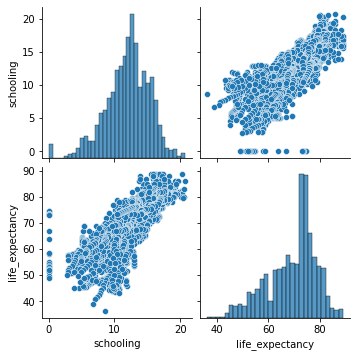

In [88]:
import seaborn as sns

schooling_df = life_expectancy[['schooling', 'life_expectancy']].copy()
sns.pairplot(schooling_df)

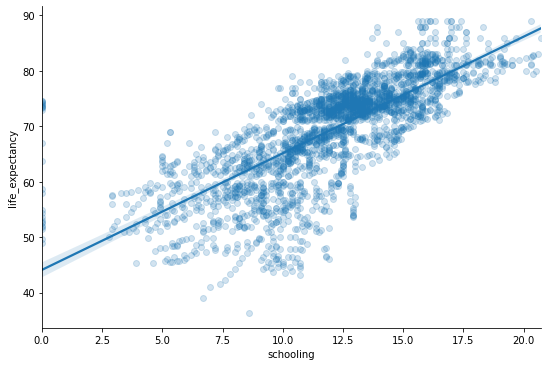

In [89]:
sns.lmplot(x='schooling', y='life_expectancy', data=schooling_df, aspect=1.5, scatter_kws={'alpha':0.2});

#### General Clean-Up

under five deaths and infant deaths - under five deaths includes infant deaths;
thinness 1-19 and 5-9 - 1-19 include 5-9

In [90]:
life_expectancy.drop(['thinness_5_9', 'infant_deaths'], axis='columns', inplace=True)

#### Finding control variables

Generally established that there is an association between schooling and association i.e. the more years attended at school the higher the life expectancy

Need to find control variables that have a correlation with both our primary feature and predictor to be included in the linear regression model for analysis in order to remove variable bias. 

In [91]:
life_expectancy.corr() 

,country,year,developed,life_expectancy,adult_mortality,alcohol,percentage_exp,hep_b,measles,bmi,under-five deaths,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,income_composition,schooling
country,1.000000e+00,-4.799570e-19,1.014614e-02,-0.033378,0.051496,-0.089970,-0.025880,-0.024310,-0.007447,0.010493,-0.022127,0.024791,0.008247,-0.005252,0.094792,-0.016173,-0.016677,0.026035,-0.024883,-0.024796
year,-4.799570e-19,1.000000e+00,-1.863462e-19,0.171042,-0.075688,-0.049335,0.033790,0.110293,-0.092102,0.101722,-0.042362,0.084771,0.084972,0.139937,-0.136833,0.103709,0.017199,-0.040567,0.242953,0.213265
developed,1.014614e-02,-1.863462e-19,1.000000e+00,0.475475,-0.299422,0.585408,0.484209,0.112121,-0.071212,0.291515,-0.109420,0.219957,0.262262,0.204813,-0.143687,0.478009,-0.045892,-0.357715,0.478826,0.515827
life_expectancy,-3.337755e-02,1.710425e-01,4.754751e-01,1.000000,-0.684585,0.381469,0.396084,0.240207,-0.141217,0.563736,-0.204858,0.454795,0.193112,0.464119,-0.563175,0.461250,-0.021538,-0.464487,0.724776,0.751975
adult_mortality,5.149568e-02,-7.568771e-02,-2.994216e-01,-0.684585,1.000000,-0.171503,-0.248033,-0.143838,0.010355,-0.375359,0.078506,-0.260643,-0.091961,-0.252511,0.529330,-0.295616,-0.013647,0.289868,-0.457626,-0.454612
alcohol,-8.996995e-02,-4.933502e-02,5.854083e-01,0.381469,-0.171503,1.000000,0.365709,0.066802,-0.032547,0.325384,-0.099810,0.201996,0.287211,0.201957,-0.038350,0.354148,-0.035376,-0.417539,0.450254,0.548001
percentage_exp,-2.587963e-02,3.379037e-02,4.842085e-01,0.396084,-0.248033,0.365709,1.000000,0.017548,-0.055398,0.234671,-0.085891,0.151327,0.199731,0.145119,-0.100403,0.899350,-0.025716,-0.260087,0.382244,0.391466
hep_b,-2.430967e-02,1.102926e-01,1.121208e-01,0.240207,-0.143838,0.066802,0.017548,1.000000,-0.116052,0.148289,-0.227033,0.484866,0.069019,0.606706,-0.107844,0.082908,-0.123834,-0.113541,0.199141,0.222895
measles,-7.447231e-03,-9.210178e-02,-7.121249e-02,-0.141217,0.010355,-0.032547,-0.055398,-0.116052,1.000000,-0.168094,0.528582,-0.117917,-0.090644,-0.119843,0.031357,-0.076420,0.265936,0.231512,-0.129465,-0.138344
bmi,1.049287e-02,1.017215e-01,2.915152e-01,0.563736,-0.375359,0.325384,0.234671,0.148289,-0.168094,1.000000,-0.229067,0.278410,0.217155,0.274145,-0.241796,0.304136,-0.072051,-0.532257,0.509299,0.558363


<AxesSubplot:>

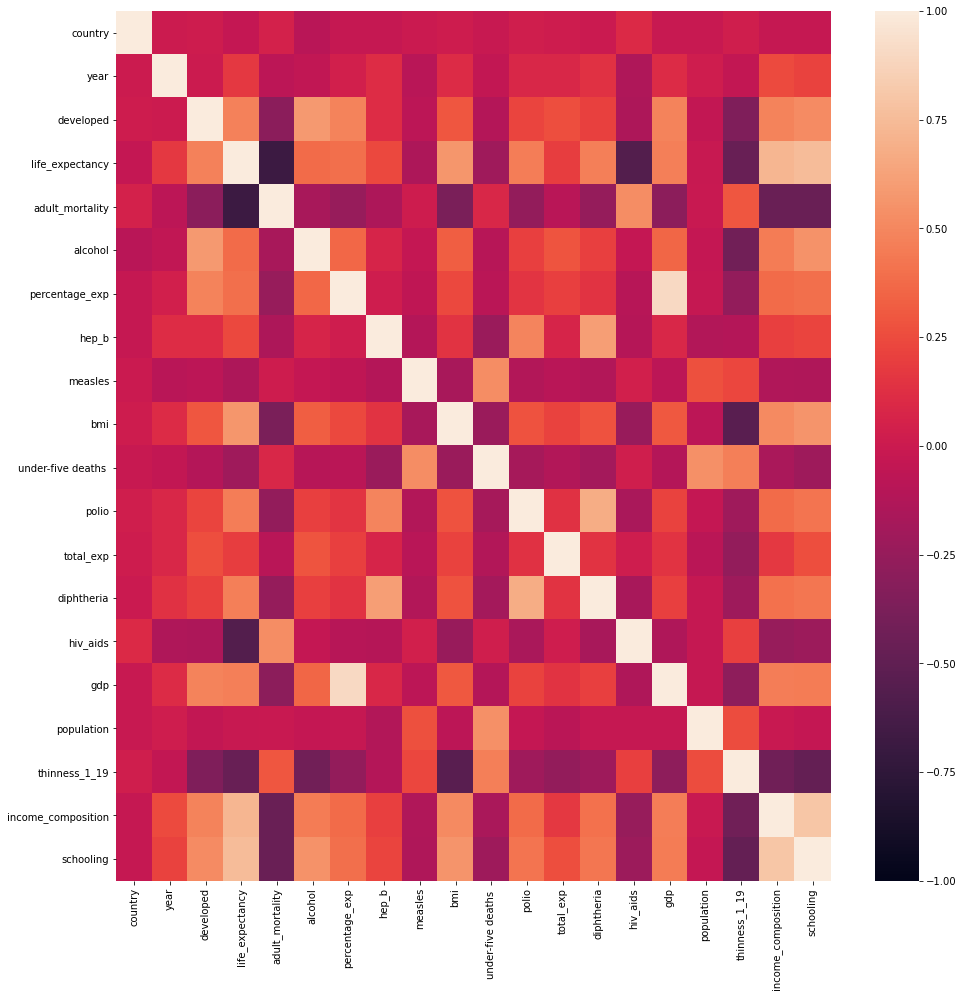

In [92]:
plt.figure(figsize = (16,16))

sns.set_palette("coolwarm", 7)
sns.heatmap(life_expectancy.corr(), vmin=-1, vmax=1) 

Choosing adult mortality and income composition as the control features as they are correlated with both life expectancy and schooling (-0.6 and -0.4, 0.7 and 0.8, respectively).

#### General Information

New three features: Adult Mortality, Income Composition and Schooling;
Predictor: Life expectancy

In [93]:
# adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
life_expectancy['adult_mortality'].describe()

count    2768.000000
mean      163.041546
std       122.954439
min         1.000000
25%        73.000000
50%       143.500000
75%       225.000000
max       723.000000
Name: adult_mortality, dtype: float64

In [94]:
# human Development Index in terms of income composition of resources (index ranging from 0 to 1)
# http://hdr.undp.org/en/content/human-development-index-hdi
life_expectancy['income_composition'].describe()

count    2768.000000
mean        0.627419
std         0.210978
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779250
max         0.948000
Name: income_composition, dtype: float64

In [95]:
# number of years of Schooling(years)
life_expectancy['schooling'].describe()

count    2768.000000
mean       11.999639
std         3.346440
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: schooling, dtype: float64

In [96]:
# add new control features
schooling_df['adult_mortality'] = life_expectancy['adult_mortality']
schooling_df['income_composition'] = life_expectancy['income_composition']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


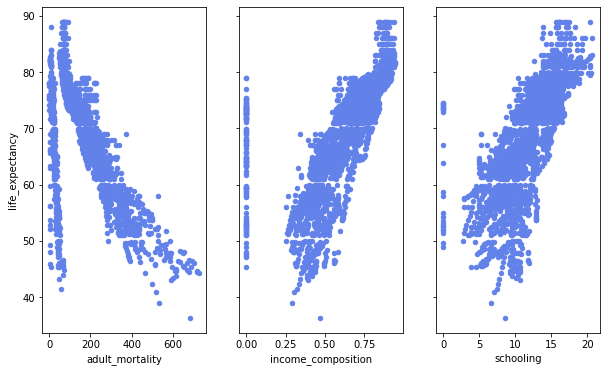

In [97]:
fig, axs = plt.subplots(1, 3, sharey=True)

schooling_df.plot(kind='scatter', x='adult_mortality', y='life_expectancy', ax=axs[0], figsize=(10, 6));
schooling_df.plot(kind='scatter', x='income_composition', y='life_expectancy', ax=axs[1]);
schooling_df.plot(kind='scatter', x='schooling', y='life_expectancy', ax=axs[2]);

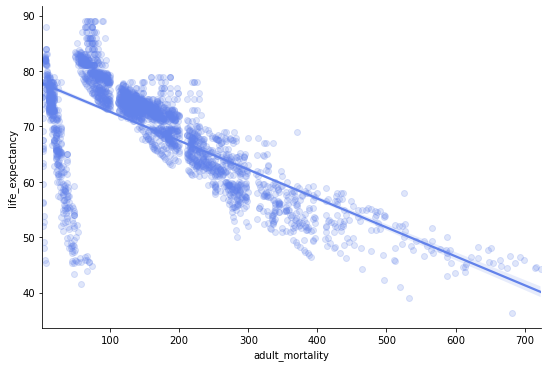

In [98]:
sns.lmplot(x='adult_mortality', y='life_expectancy', data=schooling_df, aspect=1.5, scatter_kws={'alpha':0.2});

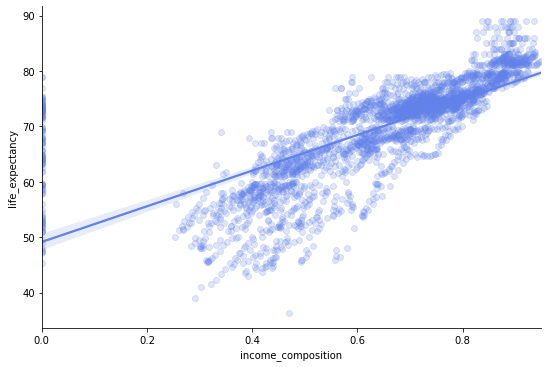

In [99]:
sns.lmplot(x='income_composition', y='life_expectancy', data=schooling_df, aspect=1.5, scatter_kws={'alpha':0.2});

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


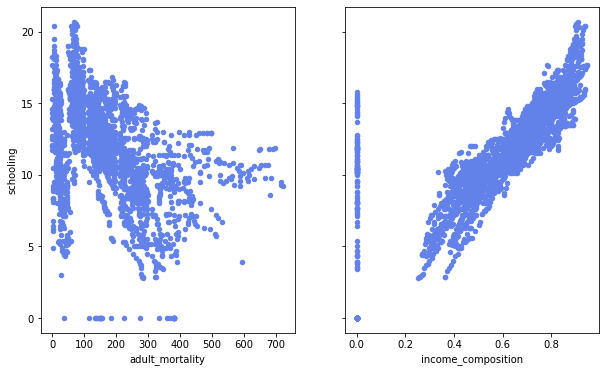

In [100]:
fig, axs = plt.subplots(1, 2, sharey=True)

schooling_df.plot(kind='scatter', x='adult_mortality', y='schooling', ax=axs[0], figsize=(10, 6));
schooling_df.plot(kind='scatter', x='income_composition', y='schooling', ax=axs[1]);

In [101]:
schooling_df.corr()

,schooling,life_expectancy,adult_mortality,income_composition
schooling,1.000000,0.751975,-0.454612,0.800046
life_expectancy,0.751975,1.000000,-0.684585,0.724776
adult_mortality,-0.454612,-0.684585,1.000000,-0.457626
income_composition,0.800046,0.724776,-0.457626,1.000000


#### New Feature Clean-Up

In [102]:
schooling_df['adult_mortality'].isna().unique()

array([False])

In [103]:
schooling_df['income_composition'].isna().unique()

array([False])

There are cofounders that aren't taken into consideration in this dataset such as homelessness which could effect both life expectancy and years of schooling.

Features - Schooling, Adult Mortality and Income Composition
Predictor - Life Expectancy

Correlation of 75% between schooling and life_expectancy (Strong association) 
Consistent across different countries and different size populations
Specifically looking at the years of schooling taken
Logically as life expectancy increases it doesn't make sense that, that would increase someones years in schooling

Missing data not at random - from 10 countries 
No class imbalance as there is a wide range of life expectancies

###  Linear Regression Modelling

Testing and training on the same data set.

Regression Model fits the data to 73% - For the variation in life expectancy the features account for 73%
With 0 income_comp, adult_mortality and schooling - life expectancy is 54.5 years old

For every additional year of schooling the life expectancy of a person goes up 1.11 years

RMSE is 4.8 years off considerably more accurate than the baseline at 9.3 years.

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [105]:
feature_cols = ['income_composition', 'adult_mortality', 'schooling']

def run_linreg():
    X = schooling_df[feature_cols]
    y = schooling_df['life_expectancy']

    lr = LinearRegression()
    lr.fit(X, y)

    print("Score: " + str(lr.score(X, y)))
    print("Intercept: " + str(lr.intercept_))
    print("Coeff: " + str(list(zip(feature_cols, lr.coef_))) + "\n")

    y_pred_100_100 = lr.predict(X)
    print('MSE: ' + str(metrics.mean_squared_error(y, y_pred_100_100))) 
    print('MAE: ' + str(metrics.mean_absolute_error(y, y_pred_100_100))) 
    print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y, y_pred_100_100))))
    
    #Create a baseline to compare too
    schooling_df['life_expectancy'].mean()
    schooling_df['life_expectancy_pred'] = y_pred_100_100
    schooling_df['life_expectancy_base'] = schooling_df['life_expectancy'].mean()
    
    print('Baseline MSE: ' + str(metrics.mean_squared_error(y, schooling_df['life_expectancy_base']))) # model considerably better than baseline
    print('Baseline MAE: ' + str(metrics.mean_absolute_error(y, schooling_df['life_expectancy_base']))) 
    print('Baseline RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y, schooling_df['life_expectancy_base'])))) 

In [106]:
run_linreg()

Score: 0.7330843486682198
Intercept: 55.05510897433187
Coeff: [('income_composition', 10.50526479776593), ('adult_mortality', -0.030756089657192766), ('schooling', 1.0598467565044325)]

MSE: 23.379843853576872
MAE: 3.3186164756669214
RMSE: 4.835270814915838
Baseline MSE: 87.59262986985867
Baseline MAE: 7.614992252497575
Baseline RMSE: 9.35909343205092


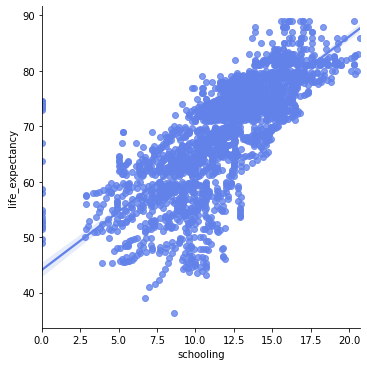

In [107]:
sns.lmplot(x="schooling", y="life_expectancy", data=schooling_df)

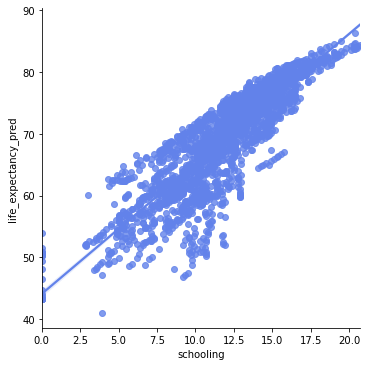

In [108]:
sns.lmplot(x="schooling", y="life_expectancy_pred", data=schooling_df)

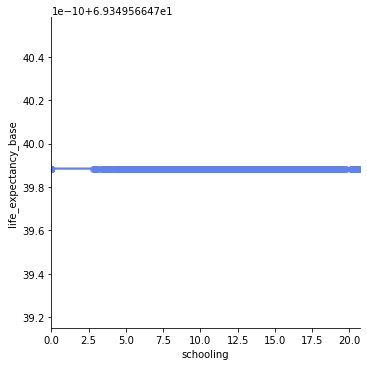

In [109]:
sns.lmplot(x="schooling", y="life_expectancy_base", data=schooling_df)

#### Consider 70/30, 80/20 and 90/10 Test-Train splits

In [110]:
from sklearn.model_selection import train_test_split

def run_prediction(X_test, y_test, X_train, y_train, lr):
    y_pred_test = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)
    
    y_null = np.zeros_like(y_test, dtype=float)
    y_null.fill(y_test.mean())
    
    print("Train RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))
    print("Base RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_null))))
        
    plt.scatter(X_test['schooling'], y_pred_test) # dark blue
    plt.xlabel("Actual Schooling Years")
    plt.ylabel("Predicted Life expectancy")
    plt.title("Actual Schooling Years vs Predicted Life expectancy")
    
    plt.scatter(X_train['schooling'], y_pred_train) # light blue
    

def run_test_train_split(test_size, train_size):
    X = schooling_df[feature_cols]
    y = schooling_df['life_expectancy']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=1)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    print("Train Score: " + str(lr.score(X_train, y_train)))
    print("Test Score: " + str(lr.score(X_test, y_test)))
    print("Intercept: " + str(lr.intercept_))
    print("Coeff: " + str(list(zip(feature_cols, lr.coef_))) + '\n')
    
    run_prediction(X_test, y_test, X_train, y_train, lr)

Test-Train 70:30
Fits slightly less on the test data 73.1% to 72.9% (Very close)
Coeff: 0.9 year per additional schooling year
Err slightly lower on test data 4.88 to 4.82
Still better than baseline at 9.35 err

Test-Tain 80:20
Fits better on the test data 72% to 73%
Coeff: 0.9 year per additional schooling year
Err reduced on test data 4.9 to 4.8 
Still better than baseline at 9.36 err

Test-Tain 90:10
Fits better on the train data 75% to 72% - slightly overfitted
Coeff: 0.6 year per additional schooling year
Err reduced on test data 4.68 to 4.85
Still better than baseline at 9.37 err

Lowest err on the test set is on the 80:20 split and the best fitted to the test data.

Train Score: 0.7312084571486599
Test Score: 0.7291865490314166
Intercept: 53.73926534392792
Coeff: [('income_composition', 14.354145698703004), ('adult_mortality', -0.028737009161118283), ('schooling', 0.9278331265160331)]

Train RMSE: 4.857300291765927
Test RMSE: 4.86729964912023
Base RMSE: 9.353043800187542


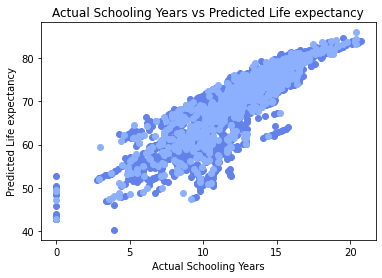

In [111]:
run_test_train_split(0.7, 0.3)

Train Score: 0.7245770042708399
Test Score: 0.7339454279994092
Intercept: 55.19292663360997
Coeff: [('income_composition', 12.613709073082806), ('adult_mortality', -0.031257289777556416), ('schooling', 0.9433812025399895)]

Train RMSE: 4.903694974880625
Test RMSE: 4.828365583370477
Base RMSE: 9.36083914331694


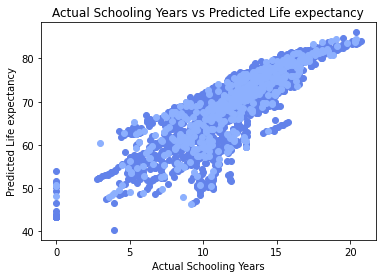

In [112]:
run_test_train_split(0.8, 0.2)

Train Score: 0.754471834403292
Test Score: 0.7167668611122128
Intercept: 57.91695179105102
Coeff: [('income_composition', 16.385984576408784), ('adult_mortality', -0.03587248462460022), ('schooling', 0.5919453183101532)]

Train RMSE: 4.579342743774494
Test RMSE: 4.987641874102687
Base RMSE: 9.371804700633307


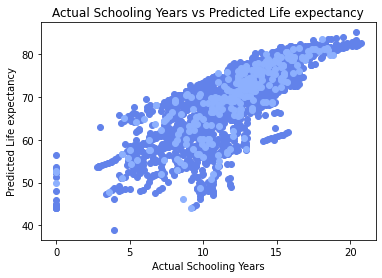

In [113]:
run_test_train_split(0.9, 0.1)

In [114]:
schooling_df[schooling_df['pred_err'] == 0]

KeyError: 'pred_err'

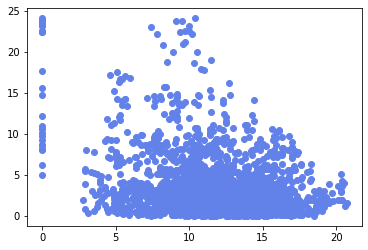

In [115]:
schooling_df['pred_err'] = schooling_df['life_expectancy_pred'] - schooling_df['life_expectancy']
schooling_df['pred_err_sq'] = np.sqrt((schooling_df['life_expectancy_pred'] - schooling_df['life_expectancy'])**2)

plt.scatter(schooling_df['schooling'], schooling_df['pred_err_sq'])

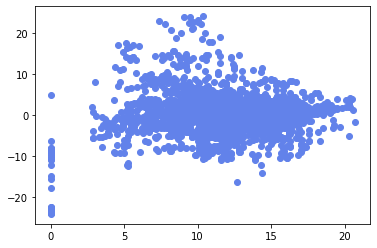

In [116]:
plt.scatter(schooling_df['schooling'], schooling_df['pred_err'])

In [117]:
schooling_df = schooling_df[schooling_df['schooling'] > 13]
run_linreg()

Score: 0.5592844665908983
Intercept: 57.516865583912164
Coeff: [('income_composition', 10.544494949324399), ('adult_mortality', -0.030584708024088778), ('schooling', 0.9161256596404324)]

MSE: 9.618664807353804
MAE: 2.257847093849881
RMSE: 3.1013972346917775
Baseline MSE: 21.825109573401647
Baseline MAE: 3.7596694698151047
Baseline RMSE: 4.67173517800417


<ipython-input-105-2830a580bf69>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schooling_df['life_expectancy_pred'] = y_pred_100_100
<ipython-input-105-2830a580bf69>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schooling_df['life_expectancy_base'] = schooling_df['life_expectancy'].mean()


Train Score: 0.6661802720526349
Test Score: 0.5046115243042546
Intercept: 54.84056212329861
Coeff: [('income_composition', 13.869015901354421), ('adult_mortality', -0.03453695835519766), ('schooling', 0.9367955742561153)]

Train RMSE: 2.953423203090173
Test RMSE: 3.2019772758215863
Base RMSE: 4.549307529628664


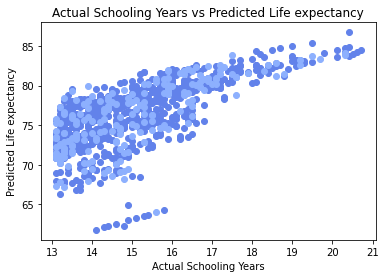

In [118]:
run_test_train_split(0.8, 0.2)

#### K-Fold Validation

The best number of folds here is for 8-folds as it has the lowest error of 4.81 on average and has an average fit of 73%. Using Test-Tain split at 80:20 has a very similar result to the k-fold average.

In [119]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=8, shuffle=True, random_state=1) # manually update values 5 to 10
rmse_values = []
scores = []
n = 0
X = schooling_df[feature_cols]
y = schooling_df['life_expectancy']

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 3.1913375430880615
R2: 0.5590557889403378

Model 2
MSE: 2.7102103447017942
R2: 0.5589773211029865

Model 3
MSE: 3.1135536633406504
R2: 0.5587808957387519

Model 4
MSE: 3.482154006674319
R2: 0.558992590552615

Model 5
MSE: 2.9846945576143433
R2: 0.5590536696230893

Model 6
MSE: 3.4062853101918145
R2: 0.5587547959054459

Model 7
MSE: 2.7184222444654758
R2: 0.5589039548571129

Model 8
MSE: 3.263030021735512
R2: 0.5588407415212256

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of RMSE for all folds: 3.108710961476496
Mean of R2 for all folds: 0.5589199697801956


#### Removing Outliers

Looking at the Scatter Graph the outliers here appear to be the points at schooling at 0 years and life_expectancy at 35 with shooling of 8 years.

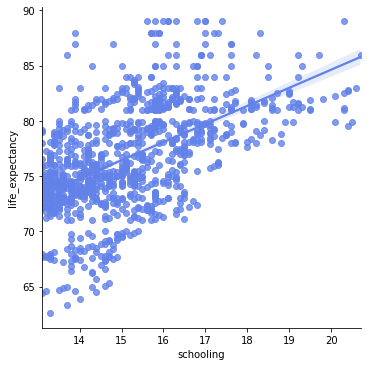

In [120]:
sns.lmplot(x="schooling", y="life_expectancy", data=schooling_df)

In [121]:
schooling_df.drop(['life_expectancy_pred', 'life_expectancy_base'], axis='columns', inplace=True)

/Users/gnuthall/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [122]:
from scipy import stats
schooling_df[(np.abs(stats.zscore(schooling_df)) < 4).all(axis=1)] # remove anything below the threshhold of the z-score for each col

,schooling,life_expectancy,adult_mortality,income_composition,pred_err,pred_err_sq
16,14.2,77.8,74.0,0.762,-1.966006,1.966006
17,14.2,77.5,8.0,0.761,0.353391,0.353391
18,14.2,77.2,84.0,0.759,-1.705083,1.705083
19,14.2,76.9,86.0,0.752,-1.540132,1.540132
20,13.3,76.6,88.0,0.738,-2.402580,2.402580
...,...,...,...,...,...,...
2861,14.1,73.7,161.0,0.767,-0.595244,0.595244
2862,14.1,73.8,158.0,0.756,-0.718534,0.718534
2863,14.0,73.7,158.0,0.754,-0.745529,0.745529
2864,14.0,73.6,166.0,0.754,-0.891578,0.891578


Train Score: 0.6661802720526349
Test Score: 0.5046115243042546
Intercept: 54.84056212329861
Coeff: [('income_composition', 13.869015901354421), ('adult_mortality', -0.03453695835519766), ('schooling', 0.9367955742561153)]

Train RMSE: 2.953423203090173
Test RMSE: 3.2019772758215863
Base RMSE: 4.549307529628664


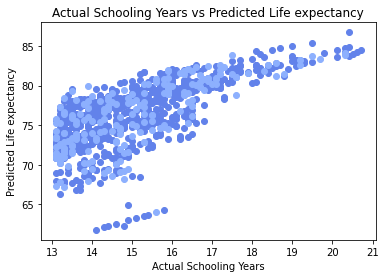

In [123]:
run_test_train_split(0.8, 0.2) # no significant impact

### Imputation of School Data using Classification

I've created ranges that fit into the schooling data quartiles to provide a category for the missing schooling data to be predicted into. 

In [124]:
cluster_df = life_expectancy.copy()
cluster_df.shape
cluster_df['schooling'].unique()
cluster_df['schooling'].describe()

count    2768.000000
mean       11.999639
std         3.346440
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: schooling, dtype: float64

In [125]:
mask_1 = (cluster_df['schooling'] >= 0) & (cluster_df['schooling'] < 10.1)
mask_2 = (cluster_df['schooling'] >= 10.1) & (cluster_df['schooling'] < 12.3)
mask_3 = (cluster_df['schooling'] >= 12.3) & (cluster_df['schooling'] < 14.3)
mask_4 = (cluster_df['schooling'] >= 14.3) & (cluster_df['schooling'] < 20.7)
mask_5 = cluster_df['schooling'] >= 20.7

In [126]:
cluster_df['schooling_num'] = pd.Series()
cluster_df['schooling_num'].mask(mask_1, 0, inplace=True)
cluster_df['schooling_num'].mask(mask_2, 1, inplace=True)
cluster_df['schooling_num'].mask(mask_3, 2, inplace=True)
cluster_df['schooling_num'].mask(mask_4, 3, inplace=True)
cluster_df['schooling_num'].mask(mask_5, 4, inplace=True)

<ipython-input-126-18828f3b9c29>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cluster_df['schooling_num'] = pd.Series()


Progress with looking at EDA specifically for the classification model. Using the ranges for schooling, its clearer to see that life_expectancy increases with each quartile. Manually looking at the developed value for each schooling range because its a binary value and the average here doesn't make much sense. The developed category also looks like an ideal feature for schooling as there are more and more developed countries that have a higher amount of schooling, whereas as the schooling years increase, the amount of developing countries that have that amount of schooling are decreasing.

In [127]:
cluster_df.groupby('schooling_num').mean() # life_expectancy average increases with schooling num

,country,year,developed,life_expectancy,adult_mortality,alcohol,percentage_exp,hep_b,measles,bmi,under-five deaths,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,income_composition,schooling
schooling_num,,,,,,,,,,,,,,,,,,,,
0.0,90.983824,2006.295588,0.000000,58.542500,242.750000,2.075683,60.883277,67.403118,4691.305882,21.271605,110.167647,65.671192,5.142700,65.078431,3.696765,850.284576,1.911487e+07,8.198765,0.396450,7.522059
1.0,105.081448,2006.936652,0.006033,67.318250,190.814480,2.865573,165.895847,81.485666,2990.822021,34.460784,43.055807,83.407240,5.751449,83.726998,2.564253,2112.509612,1.162028e+07,5.677979,0.564887,11.206033
2.0,95.415869,2008.205198,0.112175,73.102462,132.101231,4.938559,640.471935,86.125541,731.203830,44.664432,10.068399,88.046639,5.681307,88.688615,0.800000,8072.062246,1.130780e+07,4.086320,0.719733,13.143228
3.0,88.636364,2008.481962,0.544012,77.914574,91.030303,8.136019,2233.040840,85.047801,532.616162,52.054401,2.474747,92.844156,6.903087,92.380952,0.108225,17537.459114,8.486664e+06,1.866522,0.816098,15.933622
4.0,8.000000,2004.000000,1.000000,86.000000,69.000000,9.840000,588.568371,95.000000,70.000000,6.900000,1.000000,92.000000,8.570000,92.000000,0.100000,3472.379770,2.127400e+04,0.700000,0.908000,20.700000


In [128]:
# Developed looks like a good feature to categories schooling by

print(cluster_df[cluster_df['schooling_num'] == 1]['developed'].value_counts())
print(cluster_df[cluster_df['schooling_num'] == 2]['developed'].value_counts())
print(cluster_df[cluster_df['schooling_num'] == 3]['developed'].value_counts())
print(cluster_df[cluster_df['schooling_num'] == 4]['developed'].value_counts())

0    659
1      4
Name: developed, dtype: int64
0    649
1     82
Name: developed, dtype: int64
1    377
0    316
Name: developed, dtype: int64
1    1
Name: developed, dtype: int64


In [129]:
# Taking a look at which other features make sense to categorise by
cluster_df.corr() # income composition and life expectancy have high correlations with schooling and eachother

,country,year,developed,life_expectancy,adult_mortality,alcohol,percentage_exp,hep_b,measles,bmi,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,income_composition,schooling,schooling_num
country,1.000000e+00,-4.799570e-19,1.014614e-02,-0.033378,0.051496,-0.089970,-0.025880,-0.024310,-0.007447,0.010493,...,0.024791,0.008247,-0.005252,0.094792,-0.016173,-0.016677,0.026035,-0.024883,-0.024796,-0.034441
year,-4.799570e-19,1.000000e+00,-1.863462e-19,0.171042,-0.075688,-0.049335,0.033790,0.110293,-0.092102,0.101722,...,0.084771,0.084972,0.139937,-0.136833,0.103709,0.017199,-0.040567,0.242953,0.213265,0.188678
developed,1.014614e-02,-1.863462e-19,1.000000e+00,0.475475,-0.299422,0.585408,0.484209,0.112121,-0.071212,0.291515,...,0.219957,0.262262,0.204813,-0.143687,0.478009,-0.045892,-0.357715,0.478826,0.515827,0.518254
life_expectancy,-3.337755e-02,1.710425e-01,4.754751e-01,1.000000,-0.684585,0.381469,0.396084,0.240207,-0.141217,0.563736,...,0.454795,0.193112,0.464119,-0.563175,0.461250,-0.021538,-0.464487,0.724776,0.751975,0.761915
adult_mortality,5.149568e-02,-7.568771e-02,-2.994216e-01,-0.684585,1.000000,-0.171503,-0.248033,-0.143838,0.010355,-0.375359,...,-0.260643,-0.091961,-0.252511,0.529330,-0.295616,-0.013647,0.289868,-0.457626,-0.454612,-0.466166
alcohol,-8.996995e-02,-4.933502e-02,5.854083e-01,0.381469,-0.171503,1.000000,0.365709,0.066802,-0.032547,0.325384,...,0.201996,0.287211,0.201957,-0.038350,0.354148,-0.035376,-0.417539,0.450254,0.548001,0.561516
percentage_exp,-2.587963e-02,3.379037e-02,4.842085e-01,0.396084,-0.248033,0.365709,1.000000,0.017548,-0.055398,0.234671,...,0.151327,0.199731,0.145119,-0.100403,0.899350,-0.025716,-0.260087,0.382244,0.391466,0.380607
hep_b,-2.430967e-02,1.102926e-01,1.121208e-01,0.240207,-0.143838,0.066802,0.017548,1.000000,-0.116052,0.148289,...,0.484866,0.069019,0.606706,-0.107844,0.082908,-0.123834,-0.113541,0.199141,0.222895,0.236159
measles,-7.447231e-03,-9.210178e-02,-7.121249e-02,-0.141217,0.010355,-0.032547,-0.055398,-0.116052,1.000000,-0.168094,...,-0.117917,-0.090644,-0.119843,0.031357,-0.076420,0.265936,0.231512,-0.129465,-0.138344,-0.155881
bmi,1.049287e-02,1.017215e-01,2.915152e-01,0.563736,-0.375359,0.325384,0.234671,0.148289,-0.168094,1.000000,...,0.278410,0.217155,0.274145,-0.241796,0.304136,-0.072051,-0.532257,0.509299,0.558363,0.569920


In [130]:
unknown_schooling_exp['income_composition'].isna().sum()
unknown_schooling_exp.groupby('country').mean() # cant use income composition as all data is missing the same way schooling was

,year,developed,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hep_b,measles,bmi,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,thinness_5_9,income_composition,schooling
country,,,,,,,,,,,,,,,,,,,,,
28,2007.5,0.0,50.38750,417.3125,61.5000,2.837333,0.0,63.933333,1708.2500,21.32500,...,65.9375,5.723333,68.9375,4.68750,NaN,NaN,6.73750,6.69375,NaN,NaN
45,2007.5,1.0,76.76875,71.8125,0.0000,13.026000,0.0,97.285714,22.9375,55.71250,...,98.0000,7.050000,98.1250,0.10000,NaN,NaN,1.99375,2.06250,NaN,NaN
46,2007.5,0.0,69.19375,160.8125,9.9375,3.000000,0.0,88.846154,222.5625,25.62500,...,98.2500,NaN,83.2500,0.10000,NaN,NaN,5.43750,5.45000,NaN,NaN
47,2007.5,0.0,55.68750,265.3750,234.5000,1.424000,0.0,51.333333,48922.6875,15.83750,...,55.6250,3.558667,41.8750,1.81875,NaN,NaN,8.14375,7.95625,NaN,NaN
138,2007.5,0.0,80.48750,76.1875,2.1250,8.855333,0.0,95.125000,3548.4375,23.24375,...,91.2500,5.912000,96.0625,0.10000,NaN,NaN,1.53750,1.01875,NaN,NaN
139,2007.5,0.0,69.98125,210.3125,1.0000,9.545333,0.0,95.000000,390.8750,43.90625,...,94.9375,6.956667,72.8125,0.10000,NaN,NaN,3.02500,3.20000,NaN,NaN
158,2007.5,0.0,53.31875,316.7500,49.8750,0.010000,0.0,42.000000,5494.0625,18.68750,...,29.8125,NaN,29.3125,0.83750,297.473345,NaN,7.26875,7.08125,NaN,NaN
183,2007.5,1.0,80.79375,70.3750,3.6250,11.131250,0.0,NaN,715.7500,55.38750,...,92.8750,8.534000,92.8750,0.10000,NaN,NaN,0.75000,0.50625,NaN,NaN
184,2007.5,0.0,56.00625,304.4375,95.2500,3.582667,0.0,73.500000,3348.5625,17.31875,...,83.3750,4.701333,74.6875,7.27500,NaN,NaN,7.42500,7.35625,NaN,NaN


<AxesSubplot:title={'center':'life_expectancy'}, xlabel='schooling_num'>

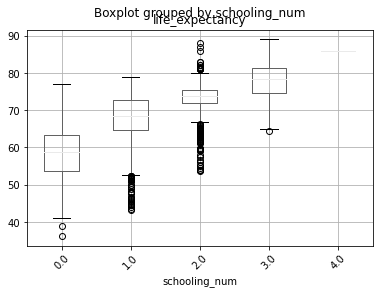

In [131]:
cluster_df.boxplot(column='life_expectancy', by='schooling_num', rot=45)

In [132]:
cluster_df[['life_expectancy', 'bmi', 'developed']].isna().sum() # bmi has 32 rows missing in the same way as income_comp
cluster_df[cluster_df['bmi'].isna()].groupby('country').mean()
cluster_df[cluster_df['country'] == 163] # for both Sudan and South Sudan

cluster_df[['life_expectancy', 'adult_mortality', 'developed']].isna().sum() # Use adult mortality instead

life_expectancy    0
adult_mortality    0
developed          0
dtype: int64

Remove outliers highlighted from the boxplot

In [133]:
cluster_df.drop(cluster_df.loc[cluster_df['life_expectancy'] < 40].index, inplace=True)
cluster_df.drop(cluster_df.loc[(cluster_df['life_expectancy'] < 55) & (cluster_df['schooling_num'] == 1)].index, inplace=True)
cluster_df.drop(cluster_df.loc[(cluster_df['life_expectancy'] < 69) & (cluster_df['schooling_num'] == 2)].index, inplace=True)
cluster_df.drop(cluster_df.loc[(cluster_df['life_expectancy'] > 79) & (cluster_df['schooling_num'] == 2)].index, inplace=True)
cluster_df.drop(cluster_df.loc[(cluster_df['life_expectancy'] < 65) & (cluster_df['schooling_num'] == 3)].index, inplace=True)

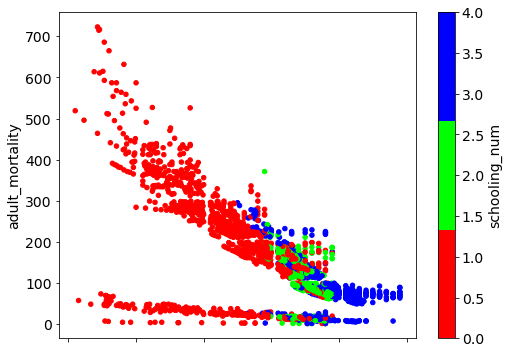

In [134]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

cluster_df.plot(kind='scatter', x='life_expectancy', y='adult_mortality', c='schooling_num', colormap=cmap_bold, figsize=(8, 6));

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cluster_df[['life_expectancy', 'adult_mortality', 'developed']]
y = cluster_df.schooling_num

Find the best number of K for Classification. The error is lowest for a low value of K i.e. 3 for that value the training score is also the highest.

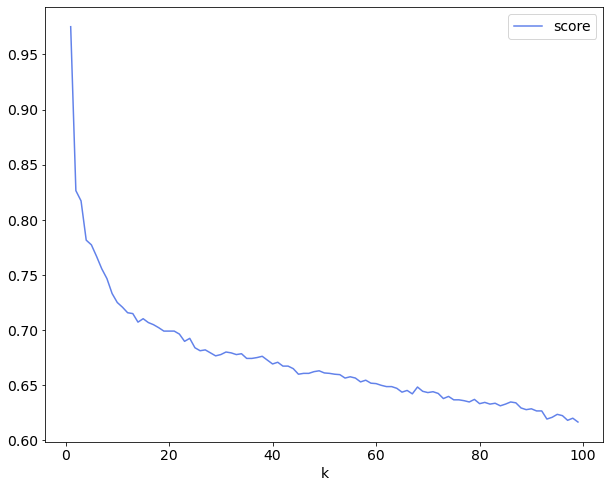

In [136]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])
    
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [137]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

NameError: name 'X_train' is not defined

In [ ]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [138]:
X = cluster_df[['life_expectancy', 'adult_mortality', 'developed']]
y = cluster_df.schooling_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class))) # 70% accuracy

0.7043343653250774


In [139]:
unknown_df = unknown_schooling_exp[['life_expectancy', 'developed', 'adult_mortality']]
unknown_df # use missing schooling info as testing data to predict on

,life_expectancy,developed,adult_mortality
432,53.3,0,397.0
433,52.8,0,47.0
434,52.3,0,412.0
435,52.0,0,415.0
436,51.7,0,419.0
...,...,...,...
2805,77.5,1,111.0
2806,77.2,1,114.0
2807,77.0,1,115.0
2808,76.9,1,115.0


In [140]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
    
y_pred_class = knn.predict(unknown_df)

In [141]:
# replace schooling range with average
unknown_schooling_exp['schooling'] = y_pred_class
unknown_schooling_exp.loc[(unknown_schooling_exp.schooling == 0), 'schooling'] = 5.05
unknown_schooling_exp.loc[(unknown_schooling_exp.schooling == 1), 'schooling'] = 11.2
unknown_schooling_exp.loc[(unknown_schooling_exp.schooling == 2), 'schooling'] = 13.3
unknown_schooling_exp.loc[(unknown_schooling_exp.schooling == 3), 'schooling'] = 17.5
unknown_schooling_exp.loc[(unknown_schooling_exp.schooling == 4), 'schooling'] = 20.7

# append new data to original life_expectancy df
combined_life_exp_df = life_expectancy.copy()
combined_life_exp_df.append(unknown_schooling_exp, ignore_index = True)
combined_life_exp_df['schooling']

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
        ... 
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: schooling, Length: 2768, dtype: float64

Check whether features are still the best to use and then Re-Run Linear Regression

In [142]:
combined_life_exp_df.corr()

,country,year,developed,life_expectancy,adult_mortality,alcohol,percentage_exp,hep_b,measles,bmi,under-five deaths,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,income_composition,schooling
country,1.000000e+00,-4.799570e-19,1.014614e-02,-0.033378,0.051496,-0.089970,-0.025880,-0.024310,-0.007447,0.010493,-0.022127,0.024791,0.008247,-0.005252,0.094792,-0.016173,-0.016677,0.026035,-0.024883,-0.024796
year,-4.799570e-19,1.000000e+00,-1.863462e-19,0.171042,-0.075688,-0.049335,0.033790,0.110293,-0.092102,0.101722,-0.042362,0.084771,0.084972,0.139937,-0.136833,0.103709,0.017199,-0.040567,0.242953,0.213265
developed,1.014614e-02,-1.863462e-19,1.000000e+00,0.475475,-0.299422,0.585408,0.484209,0.112121,-0.071212,0.291515,-0.109420,0.219957,0.262262,0.204813,-0.143687,0.478009,-0.045892,-0.357715,0.478826,0.515827
life_expectancy,-3.337755e-02,1.710425e-01,4.754751e-01,1.000000,-0.684585,0.381469,0.396084,0.240207,-0.141217,0.563736,-0.204858,0.454795,0.193112,0.464119,-0.563175,0.461250,-0.021538,-0.464487,0.724776,0.751975
adult_mortality,5.149568e-02,-7.568771e-02,-2.994216e-01,-0.684585,1.000000,-0.171503,-0.248033,-0.143838,0.010355,-0.375359,0.078506,-0.260643,-0.091961,-0.252511,0.529330,-0.295616,-0.013647,0.289868,-0.457626,-0.454612
alcohol,-8.996995e-02,-4.933502e-02,5.854083e-01,0.381469,-0.171503,1.000000,0.365709,0.066802,-0.032547,0.325384,-0.099810,0.201996,0.287211,0.201957,-0.038350,0.354148,-0.035376,-0.417539,0.450254,0.548001
percentage_exp,-2.587963e-02,3.379037e-02,4.842085e-01,0.396084,-0.248033,0.365709,1.000000,0.017548,-0.055398,0.234671,-0.085891,0.151327,0.199731,0.145119,-0.100403,0.899350,-0.025716,-0.260087,0.382244,0.391466
hep_b,-2.430967e-02,1.102926e-01,1.121208e-01,0.240207,-0.143838,0.066802,0.017548,1.000000,-0.116052,0.148289,-0.227033,0.484866,0.069019,0.606706,-0.107844,0.082908,-0.123834,-0.113541,0.199141,0.222895
measles,-7.447231e-03,-9.210178e-02,-7.121249e-02,-0.141217,0.010355,-0.032547,-0.055398,-0.116052,1.000000,-0.168094,0.528582,-0.117917,-0.090644,-0.119843,0.031357,-0.076420,0.265936,0.231512,-0.129465,-0.138344
bmi,1.049287e-02,1.017215e-01,2.915152e-01,0.563736,-0.375359,0.325384,0.234671,0.148289,-0.168094,1.000000,-0.229067,0.278410,0.217155,0.274145,-0.241796,0.304136,-0.072051,-0.532257,0.509299,0.558363


<AxesSubplot:>

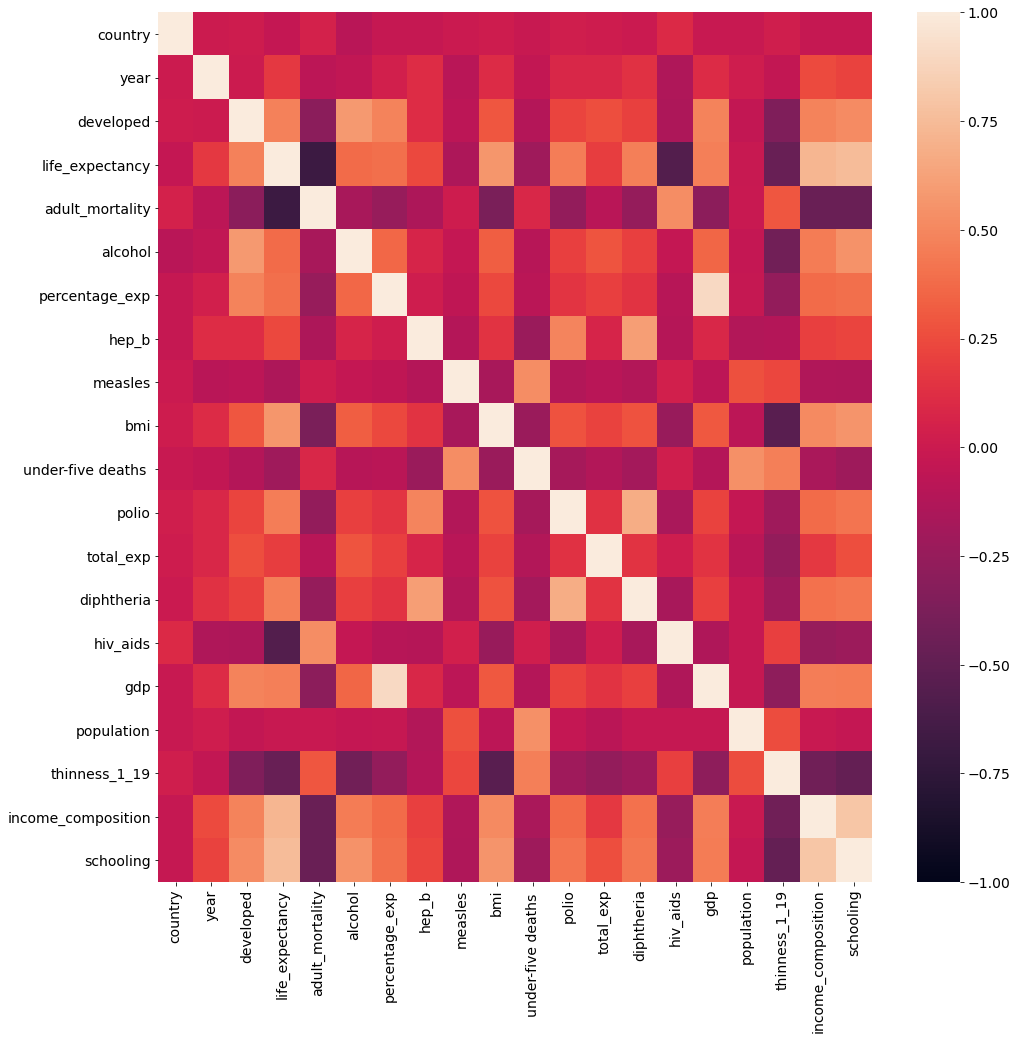

In [143]:
plt.figure(figsize = (16,16))

sns.set_palette("coolwarm", 7)
sns.heatmap(combined_life_exp_df.corr(), vmin=-1, vmax=1) #adult mortality # hiv # thinness with le - thinness and adult mortality with schooling

In [144]:
combined_life_exp_df['thinness_1_19'].isna().sum() # out of all the new features only thinness is missing values

combined_life_exp_df[combined_life_exp_df['thinness_1_19'].isna()].groupby('country').mean() # two countries Sudan and South Sudan missing any data

,year,developed,life_expectancy,adult_mortality,alcohol,percentage_exp,hep_b,measles,bmi,under-five deaths,polio,total_exp,diphtheria,hiv_aids,gdp,population,thinness_1_19,income_composition,schooling
country,,,,,,,,,,,,,,,,,,,
160,2007.5,0.0,53.875,346.3125,NaN,8.241077,31.000000,315.75,NaN,43.250,44.00,2.710000,47.000,3.69375,1092.233631,3.750827e+06,NaN,0.131688,1.53125
163,2007.5,0.0,61.825,240.3125,1.458,97.698443,72.363636,3108.00,NaN,96.625,72.25,5.695333,72.375,0.25000,1192.797953,1.804652e+07,NaN,0.441000,6.37500


In [145]:
combined_life_exp_df['income_composition'].isna().sum() # use this instead as next corre
schooling_df = combined_life_exp_df.copy()

In [146]:
run_linreg()

Score: 0.7330843486682198
Intercept: 55.05510897433187
Coeff: [('income_composition', 10.50526479776593), ('adult_mortality', -0.030756089657192766), ('schooling', 1.0598467565044325)]

MSE: 23.379843853576872
MAE: 3.3186164756669214
RMSE: 4.835270814915838
Baseline MSE: 87.59262986985867
Baseline MAE: 7.614992252497575
Baseline RMSE: 9.35909343205092


Train Score: 0.7312084571486599
Test Score: 0.7291865490314166
Intercept: 53.73926534392792
Coeff: [('income_composition', 14.354145698703004), ('adult_mortality', -0.028737009161118283), ('schooling', 0.9278331265160331)]

Train RMSE: 4.857300291765927
Test RMSE: 4.86729964912023
Base RMSE: 9.353043800187542


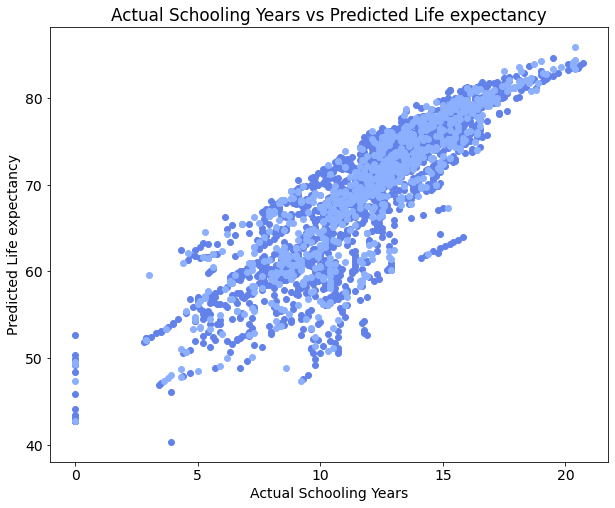

In [147]:
run_test_train_split(0.7, 0.3) # no improvement with new data

Train Score: 0.7245770042708399
Test Score: 0.7339454279994092
Intercept: 55.19292663360997
Coeff: [('income_composition', 12.613709073082806), ('adult_mortality', -0.031257289777556416), ('schooling', 0.9433812025399895)]

Train RMSE: 4.903694974880625
Test RMSE: 4.828365583370477
Base RMSE: 9.36083914331694


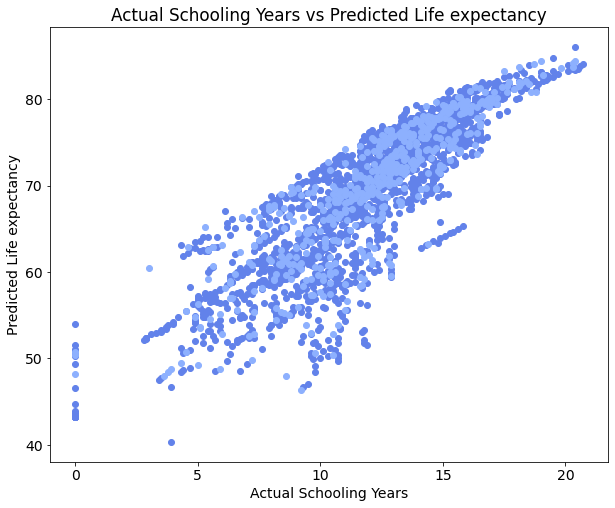

In [148]:
run_test_train_split(0.8, 0.2) # no improvement with new data

In [ ]:
run_test_train_split(0.9, 0.1) # no improvement with new data

#### Additional